In [1]:
import fix_yahoo_finance as yf

import pandas as pd
import datetime as dt
import numpy as np
import glob

import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
# sns.set()

import plotly.plotly as py
import plotly.graph_objs as go

# Read data

In [2]:
# Moody ratings from Eunice (Bloomberg)
df_moody = pd.read_excel('EDA_data/Columbia DSIC 2018 - Moody\'s data.xlsx')
df_moody = df_moody.sort_values(by=['Company', 'Effective Date'])
df_moody = df_moody.reset_index()
print(df_moody.shape, df_moody.dtypes)
df_moody.head(3)

(72, 6) index                      int64
Company                   object
Moody's Rating            object
Watch                     object
Type                      object
Effective Date    datetime64[ns]
dtype: object


,index,Company,Moody's Rating,Watch,Type,Effective Date
0,8,21st Century Fox America,B1,NaN,up,1991-11-27
1,7,21st Century Fox America,Ba2,NaN,up,1992-10-09
2,6,21st Century Fox America,Ba1,NaN,up,1993-10-14


In [3]:
# Moody ratings directly from Moody's
df_moody_ola = pd.read_excel('EDA_data/Moodys_Ola.xlsx')
print(df_moody_ola.shape, df_moody_ola.dtypes)
df_moody_ola.head(3)

(37, 5) Date             datetime64[ns]
Currency                 object
Rating                   object
Rating Action            object
Company                  object
dtype: object


,Date,Currency,Rating,Rating Action,Company
0,2018-06-15,Foreign,Baa2,Downgrade,AT&T Corp
1,2016-10-24,Foreign,Baa1,On Watch - Possible Downgrade,AT&T Corp
2,2016-08-29,Foreign,Baa1,RATING AFFIRMATION,AT&T Corp


In [4]:
# NASDAQ downloaded by Ola from Yahoo
# https://finance.yahoo.com/quote/%5Eixic/history/
df_nasdaq = pd.read_csv('EDA_data/IXIC.csv', index_col='Date')
print(df_nasdaq.shape, df_nasdaq.dtypes)
df_nasdaq.head(3)

(3724, 6) Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-02,2011.079956,2022.369995,1999.770020,2006.680054,2006.680054,1666780000
2004-01-05,2020.780029,2047.359985,2020.780029,2047.359985,2047.359985,2362910000
2004-01-06,2044.550049,2061.540039,2039.630005,2057.370117,2057.370117,2273220000


In [5]:
# stock prices - from Yahoo finance
tickers = ['FOXA', 'T', 'CBS', 'CMCSA', 'VZ']
start = dt.datetime(1994,1,1)
end = dt.datetime(2018,10,16)
df_stock = yf.download(tickers, start=start, end=end)
print(df_stock.shape, df_stock.dtypes)
df_stock.tail(3)

[*********************100%***********************]  5 of 5 downloaded
(6243, 30) Open       CBS      float64
           CMCSA    float64
           FOXA     float64
           T        float64
           VZ       float64
High       CBS      float64
           CMCSA    float64
           FOXA     float64
           T        float64
           VZ       float64
Low        CBS      float64
           CMCSA    float64
           FOXA     float64
           T        float64
           VZ       float64
Close      CBS      float64
           CMCSA    float64
           FOXA     float64
           T        float64
           VZ       float64
Adj Close  CBS      float64
           CMCSA    float64
           FOXA     float64
           T        float64
           VZ       float64
Volume     CBS      float64
           CMCSA      int64
           FOXA     float64
           T          int64
           VZ         int64
dtype: object


Open                                                   High  \
                  CBS      CMCSA       FOXA          T         VZ        CBS   
Date                                                                           
2018-10-12  54.380001  34.049999  45.299999  32.189999  53.820000  54.779999   
2018-10-15  53.939999  34.610001  45.450001  32.270000  53.880001  54.930000   
2018-10-16  54.619999  35.220001  45.599998  32.369999  53.459999  55.290001   

                                                          ...     Adj Close  \
                CMCSA       FOXA          T         VZ    ...           CBS   
Date                                                      ...                 
2018-10-12  34.790001  45.500000  32.360001  53.889999    ...     54.320000   
2018-10-15  35.669998  45.869999  32.669998  54.250000    ...     54.360001   
2018-10-16  36.099998  46.029999  32.470001  53.799999    ...     55.049999   

                                                           Volume            \
                CMCSA       FOXA          T         VZ        CBS     CMCSA   
Date                                                                          
2018-10-12  34.619999  45.360001  32.250000  53.730000  2642000.0  31439300   
2018-10-15  35.090000  45.520000  32.360001  53.599998  1717700.0  22877300   
2018-10-16  36.000000  45.950001  32.389999  53.700001  5031600.0  26282200   

                                           
                 FOXA         T        VZ  
Date                                       
2018-10-12  7426000.0  43151600  18866600  
2018-10-15  6330300.0  33242600  13022000  
2018-10-16  6584300.0  28048700  15981200  

[3 rows x 30 columns]

In [6]:
# OAS from Eunice
df_oas = pd.read_excel('EDA_data/data_OAS_columbiaU_july2018.xls', index_col='Date')
print(df_oas.shape, df_oas.dtypes)
df_oas.head(3)

(1653, 5) VZ 5.15 09/15/2023:OAS        float64
T 2.625 12/01/2022:OAS        float64
CMCSA 2.875 01/15/2023:OAS    float64
CBS 3.375 03/01/2022:OAS      float64
FOXA 3.0 09/15/2022:OAS       float64
dtype: object


,VZ 5.15 09/15/2023:OAS,T 2.625 12/01/2022:OAS,CMCSA 2.875 01/15/2023:OAS,CBS 3.375 03/01/2022:OAS,FOXA 3.0 09/15/2022:OAS
Date,,,,,
2018-07-09,92.68173,108.486595,93.50954,110.08555,78.866585
2018-07-06,95.16908,112.340270,100.11442,110.24977,82.111620
2018-07-05,101.53269,114.571190,102.46219,114.16346,87.219580


In [7]:
# Sec filings metadata
sec_dict = dict()

for file in glob.glob('Inputs/*csv'):
    df = pd.read_csv(file)
    
    df.fdate = pd.to_datetime(df.fdate)
    
    if 'comcast' in file:
        sec_dict['Comcast Corp'] = df
    if 'cbs' in file:
        sec_dict['CBS Corp'] = df
    if 'att' in file:
        sec_dict['AT&T Corp'] = df
    if 'fox' in file:
        sec_dict['21st Century Fox America'] = df
    if 'verizon' in file:
        sec_dict['Verizon Communications Inc'] = df

# Data eng

In [8]:
# map categorical Moody to numerical for plotting

moody_ratings = ['Aaa', 'Aa1', 'Aa2', 'Aa3', 'A1', 'A2', 'A3', 'Baa1', 'Baa2', 'Baa3', 'Ba1', 'Ba2', 'Ba3', 'B1']
ratings_dict = dict(zip(moody_ratings, reversed(range(14))))
df_moody['num_rating'] = df_moody["Moody's Rating"].map(ratings_dict)
df_moody.head(3)

,index,Company,Moody's Rating,Watch,Type,Effective Date,num_rating
0,8,21st Century Fox America,B1,NaN,up,1991-11-27,0.0
1,7,21st Century Fox America,Ba2,NaN,up,1992-10-09,2.0
2,6,21st Century Fox America,Ba1,NaN,up,1993-10-14,3.0


In [9]:
df_moody_ola['num_rating'] = df_moody_ola['Rating'].map(ratings_dict)
df_moody_ola.head(3)

,Date,Currency,Rating,Rating Action,Company,num_rating
0,2018-06-15,Foreign,Baa2,Downgrade,AT&T Corp,5
1,2016-10-24,Foreign,Baa1,On Watch - Possible Downgrade,AT&T Corp,6
2,2016-08-29,Foreign,Baa1,RATING AFFIRMATION,AT&T Corp,6


In [10]:
# map company name to ticker
print(df_moody.Company.unique())
comp_to_tick = dict(zip(df_moody.Company.unique(), tickers))
comp_to_tick

['21st Century Fox America' 'AT&T Corp' 'CBS Corp' 'Comcast Corp'
 'Verizon Communications Inc']


{'21st Century Fox America': 'FOXA',
 'AT&T Corp': 'T',
 'CBS Corp': 'CBS',
 'Comcast Corp': 'CMCSA',
 'Verizon Communications Inc': 'VZ'}

In [11]:
# rename df_oas columns
print(df_oas.columns)
oas_comp = ['Verizon Communications Inc',
           'AT&T Corp',
           'Comcast Corp',
           'CBS Corp',
           '21st Century Fox America']

oas_comp_dict = dict(zip(df_oas.columns, oas_comp))
print(oas_comp_dict)

df_oas.columns = df_oas.columns.to_series().map(oas_comp_dict)
df_oas.head(3)

Index(['VZ 5.15 09/15/2023:OAS', 'T 2.625 12/01/2022:OAS',
       'CMCSA 2.875 01/15/2023:OAS', 'CBS 3.375 03/01/2022:OAS',
       'FOXA 3.0 09/15/2022:OAS'],
      dtype='object')
{'VZ 5.15 09/15/2023:OAS': 'Verizon Communications Inc', 'T 2.625 12/01/2022:OAS': 'AT&T Corp', 'CMCSA 2.875 01/15/2023:OAS': 'Comcast Corp', 'CBS 3.375 03/01/2022:OAS': 'CBS Corp', 'FOXA 3.0 09/15/2022:OAS': '21st Century Fox America'}


,Verizon Communications Inc,AT&T Corp,Comcast Corp,CBS Corp,21st Century Fox America
Date,,,,,
2018-07-09,92.68173,108.486595,93.50954,110.08555,78.866585
2018-07-06,95.16908,112.340270,100.11442,110.24977,82.111620
2018-07-05,101.53269,114.571190,102.46219,114.16346,87.219580


In [12]:
# Calc stock price delta for all companies: this day-previous day (open price used)
for comp in ['FOXA', 'T', 'CBS', 'CMCSA', 'VZ']:

    temp = [np.nan]
    for i in range(1,df_stock.shape[0]):
        temp.append(df_stock['Open'][comp].iloc[i] - df_stock['Open'][comp].iloc[i-1])

    df_stock[comp+'_diff'] = temp
    
df_stock.head(3)

Open                                    High                 \
            CBS     CMCSA FOXA        T         VZ  CBS     CMCSA FOXA   
Date                                                                     
1994-01-03  NaN  4.013889  NaN  20.7500  26.698645  NaN  4.041667  NaN   
1994-01-04  NaN  3.861111  NaN  20.3750  26.024153  NaN  3.902778  NaN   
1994-01-05  NaN  3.861111  NaN  20.0625  25.405869  NaN  3.861111  NaN   

                                  ...    Volume                         \
                  T         VZ    ...       CBS    CMCSA FOXA        T   
Date                              ...                                    
1994-01-03  20.9375  26.811060    ...       NaN  4407000  NaN  1433400   
1994-01-04  20.5000  26.024153    ...       NaN  4591800  NaN  1274600   
1994-01-05  20.1250  25.405869    ...       NaN  5571000  NaN  3360600   

                    FOXA_diff  T_diff CBS_diff CMCSA_diff   VZ_diff  
                 VZ                                                  
Date                                                                 
1994-01-03  1637800       NaN     NaN      NaN        NaN       NaN  
1994-01-04  1736500       NaN -0.3750      NaN  -0.152778 -0.674492  
1994-01-05  2475700       NaN -0.3125      NaN   0.000000 -0.618284  

[3 rows x 35 columns]

# Plot

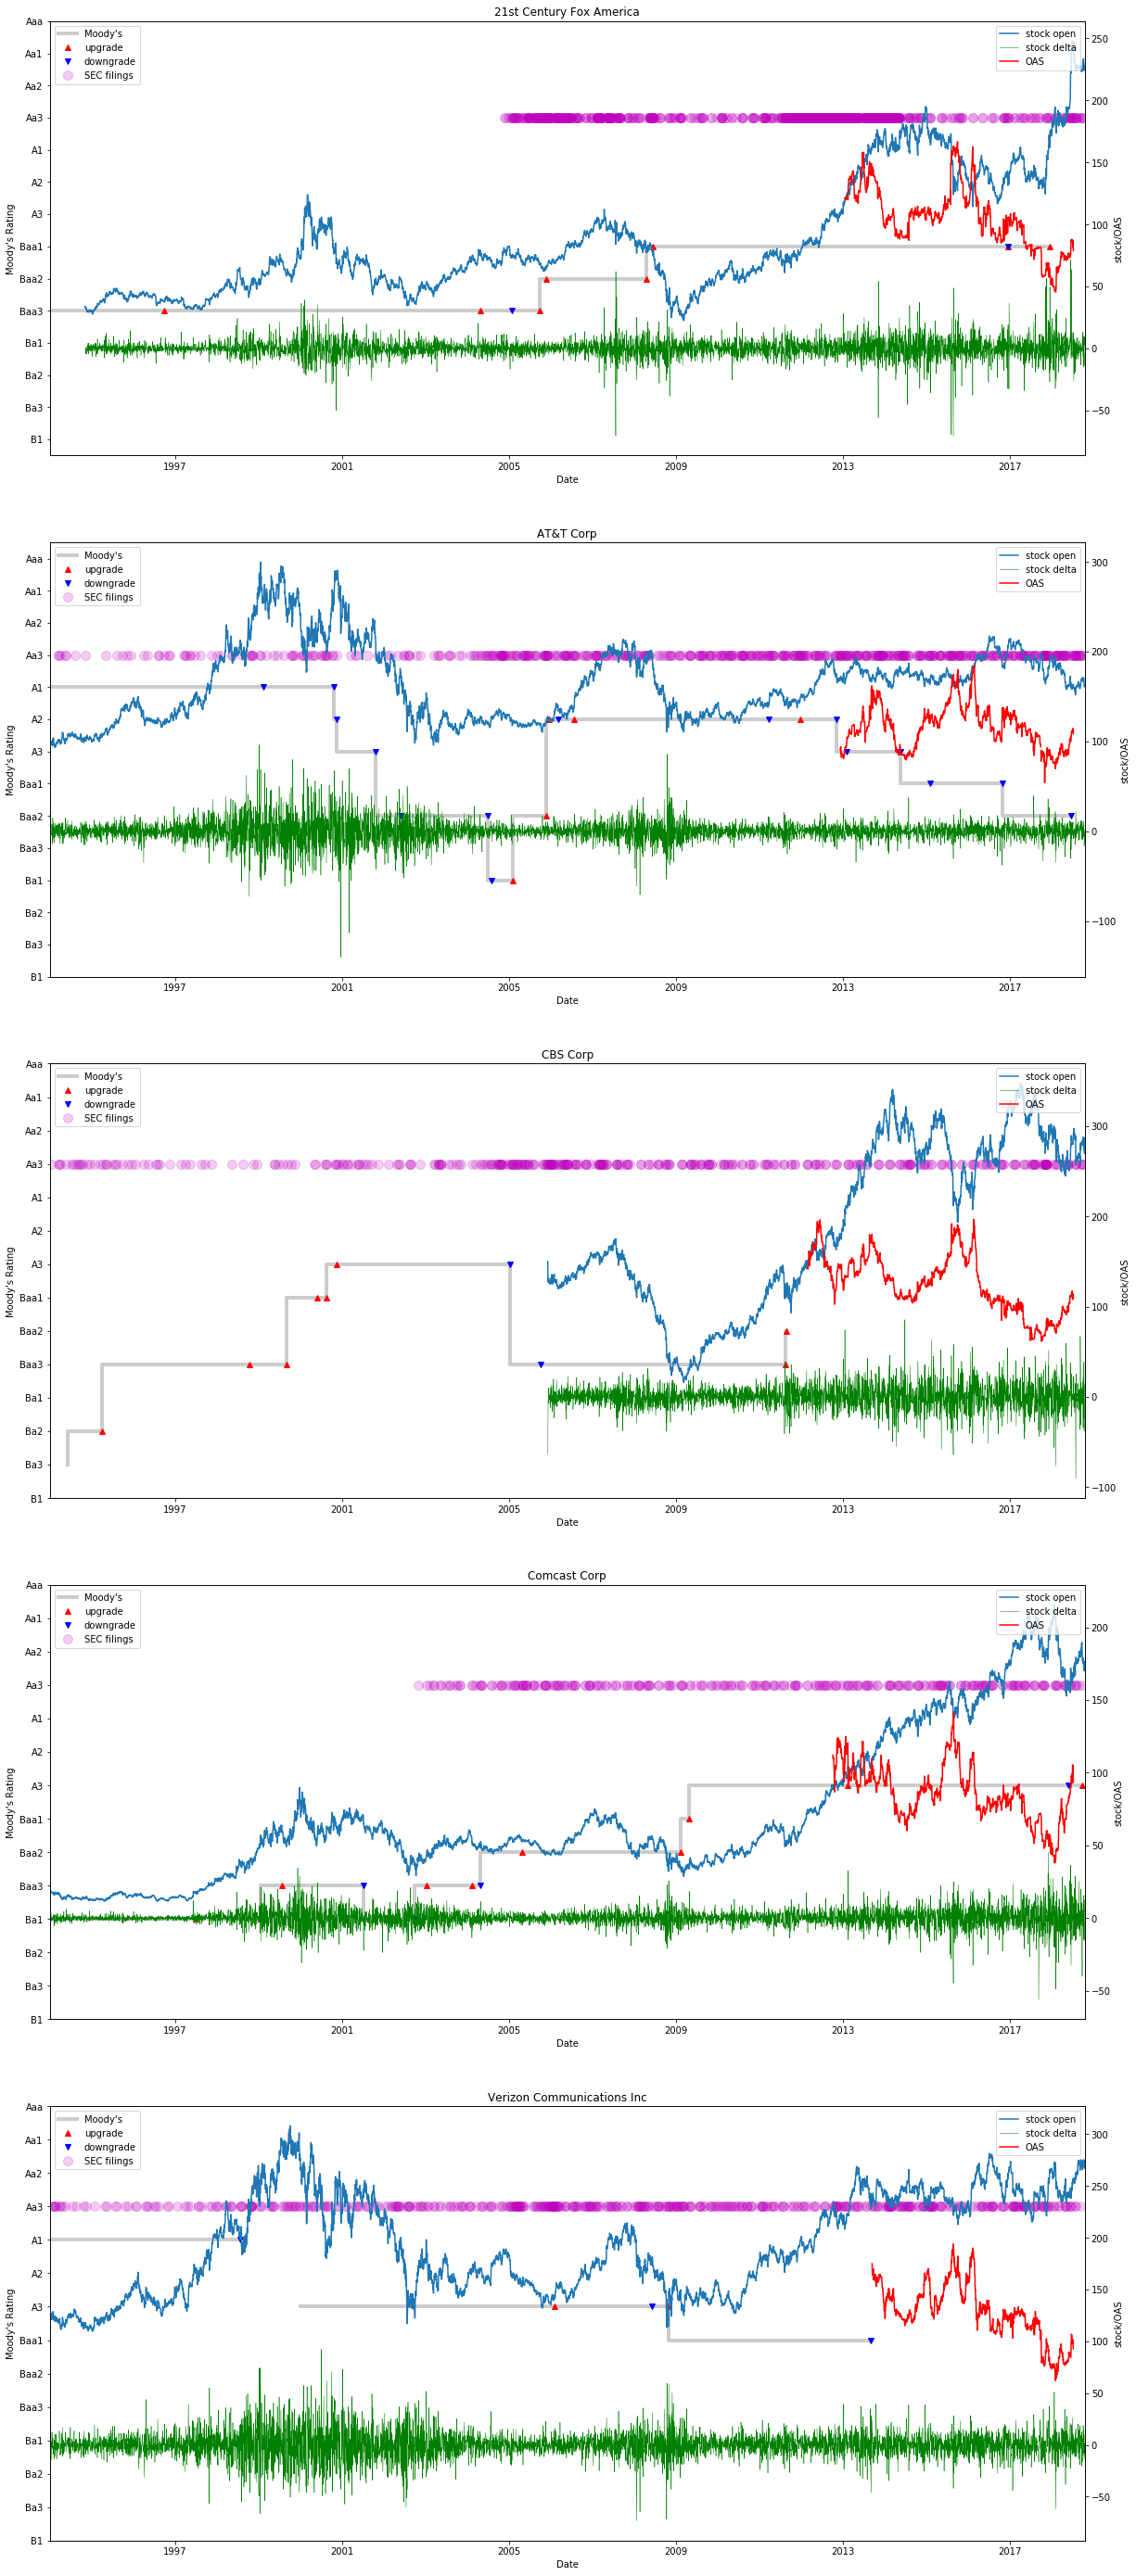

In [13]:
fig, axes = plt.subplots(5,1, figsize=(20,50))
axes = axes.ravel()

for i, comp in enumerate(df_moody.Company.unique()):
    ax = axes[i]
    
    # plot Moody from Bloomberg
    df_temp = df_moody[df_moody.Company==comp]
    ax.step(df_temp['Effective Date'], df_temp.num_rating, color=[0.8, 0.8, 0.8], where='pre', linewidth=4, label="Moody's")
    
#     # plot Moody direct
#     df_ola_temp = df_moody_ola[df_moody_ola.Company==comp]
#     df_ola_temp = df_ola_temp.sort_values(by='Date')
#     ax.step(df_ola_temp['Date'], df_ola_temp.num_rating, linestyle='--', color='k', where='pre', label="from Moody's")
    
    ax.plot(df_temp[df_temp.Type=='up']['Effective Date'], df_temp[df_temp.Type=='up']['num_rating'], 'r^', label='upgrade')
    ax.plot(df_temp[df_temp.Type=='down']['Effective Date'], df_temp[df_temp.Type=='down']['num_rating'], 'bv', label='downgrade')
    
    df_sec = sec_dict[comp]
    ax.plot(df_sec.fdate, np.ones(df_sec.shape[0])*10, 'mo', alpha=0.2, label='SEC filings', markersize=10)
    
    ax2 = ax.twinx()
    
    # plot stock price
#     ax2.plot(df_stock['Open'][comp_to_tick[comp]]*10-df_stock['Open'][comp_to_tick[comp]].iloc[0]*10, label='stock open')
    ax2.plot(df_stock['Open'][comp_to_tick[comp]]*5, label='stock open')


    
#     plot NASDAQ
#     ax2.plot(df_stock['Open'][comp_to_tick[comp]] - df_nasdaq['Open']/1000, 'r')
#     ax2.plot(df_nasdaq['Open'])
    
    # plot stock price delta
    ax2.plot(df_stock[comp_to_tick[comp]+'_diff']*20, 'g', linewidth=0.5, label='stock delta')
    
    # plot OAS
    ax2.plot(df_oas[comp], 'r', label='OAS')
    
    
    ax.set_title(comp)
    
#     ax.set_ylim([0,13])
    ax.set_xlim([dt.date(1994, 1, 1), dt.date(2018, 10, 16)])
    
    ax.yaxis.set_ticks(range(14))
    labels = [item.get_text() for item in ax.get_yticklabels()]
    labels = reversed(moody_ratings)
    ax.set_yticklabels(labels)
    
    ax.set_ylabel("Moody's Rating")
    ax.set_xlabel("Date")
    ax.legend(loc=2)
    
    ax2.set_ylabel("stock/OAS")
    ax2.legend(loc=1)
    
fig.savefig('EDA_figs/fig_EDA_Moodys-OAS-stock.pdf')

In [14]:
sec_dict

{'21st Century Fox America':           fdate      cik  findexdate  form                          coname  \
 0    2004-11-24  1308161  2004-11-24   8-K                       NEWS CORP   
 1    2004-12-03  1308161  2004-12-03   8-K                       NEWS CORP   
 2    2004-12-23  1308161  2004-12-23   8-K                       NEWS CORP   
 3    2005-01-10  1308161  2005-01-10   8-K                       NEWS CORP   
 4    2005-01-27  1308161  2005-01-27   8-K                       NEWS CORP   
 5    2005-02-02  1308161  2005-02-02   8-K                       NEWS CORP   
 6    2005-02-03  1308161  2005-02-03   8-K                       NEWS CORP   
 7    2005-02-04  1308161  2005-02-04  10-Q                       NEWS CORP   
 8    2005-02-08  1308161  2005-02-08   8-K                       NEWS CORP   
 9    2005-02-22  1308161  2005-02-22   8-K                       NEWS CORP   
 10   2005-02-23  1308161  2005-02-23   8-K                       NEWS CORP   
 11   2005-03-03  130816

# Interactive plots

In [15]:
def make_plotly(comp):

    # Create traces
    trace0 = go.Scatter(
        x = df_stock.index,
        y = df_stock['Open'][comp_to_tick[comp]]*5,
        mode = 'lines',
        name = 'stock open',
        opacity = 0.7,
        line = dict(
            color = 'slateblue',
            width = 1.5
        ))

    trace1 = go.Scatter(
        x = df_stock.index,
        y = df_stock[comp_to_tick[comp]+'_diff']*20,
        mode = 'lines',
        name = 'stock delta (prev day)',
        opacity = 0.7,
        line = dict(
            color = 'teal',
            width = 1.5
        ))

    trace2 = go.Scatter(
        x = df_oas.index,
        y = df_oas[comp],
        mode = 'lines',
        name = 'OAS/10',
        opacity = 0.7,
        line = dict(
            color = 'coral',
            width = 1.5
        ))

    df_temp = df_moody[df_moody.Company==comp]
    df_temp = df_temp.sort_values(by='Effective Date')
    df_temp['text'] = "Moody's "+ df_temp['Type'] + ', ' + df_temp['Effective Date'].map(str)

    trace3 = go.Scatter(
        x = df_temp['Effective Date'],
        y = df_temp.num_rating*10,
#         mode='lines+markers',
        mode='lines',
        name="Moody's rating",
        opacity = 0.7,
#         text=df_temp.text,
#         hoverinfo='text',
        line=dict(
            shape='hv',
            color = 'grey',
            width = 3
        ))
#         marker=dict(
#             size=15,
#             symbol='hexagon'
#         ))
    
    df_sec = sec_dict[comp]
    df_sec['text'] = df_sec['findexdate'] + ', ' + df_sec['form'].map(str) + ', ' + df_sec['doccount'].map(str)
    
    trace4 = go.Scatter(
        x = df_sec['fdate'],
        y = np.ones(df_sec.shape[0])*100,
        mode='markers',
        name="SEC filing",
        opacity = 0.7,
        text=df_sec.text,
        hoverinfo='text',
#         color=df_sec['form']
        marker=dict(
            size=10,
            color = 'magenta',
            symbol='x'
        ))
    
    trace5 = go.Scatter(
        x = df_temp[df_temp.Type=='up']['Effective Date'], 
        y = df_temp[df_temp.Type=='up']['num_rating']*10,
        mode='markers',
        name="Moody's upgrade",
        opacity = 0.7,
        text=df_temp[df_temp.Type=='up'].text,
        hoverinfo='text',
#         color=df_sec['form']
        marker=dict(
            size=15,
            color = 'blue',
            symbol='triangle-up'
        ))
    
    trace6 = go.Scatter(
        x = df_temp[df_temp.Type=='down']['Effective Date'], 
        y = df_temp[df_temp.Type=='down']['num_rating']*10,
        mode='markers',
        name="Moody's downgrade",
        opacity = 0.7,
        text=df_temp[df_temp.Type=='down'].text,
        hoverinfo='text',
#         color=df_sec['form']
        marker=dict(
            size=15,
            color = 'red',
            symbol='triangle-down'
        ))
    
    data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]
    
    layout = go.Layout(
        title = comp,
        xaxis = dict(
            range = ['2004-01-01','2018-10-16'],
            title = "Date"
    ))
    
#     py.iplot(data, filename='line-mode')

    fig = go.Figure(data=data, layout=layout)
    plot_url = py.plot(fig, filename=comp)

In [16]:
make_plotly('21st Century Fox America')
# make_plotly('AT&T Corp')
# make_plotly('CBS Corp')
# make_plotly('Comcast Corp')
# make_plotly('Verizon Communications Inc')

In [17]:
sec_prev_list = []
sec_same_list = []
sec_next_list = []

count = 0
count_dedup = 0

for comp in df_moody.Company.unique():
    
    df_temp = df_moody[df_moody.Company==comp]
#     df_temp.reset_index(inplace=True)

    df_sec = sec_dict[comp].copy()
    
    count += df_sec.shape[0]
    df_sec = df_sec.drop_duplicates(subset=['fdate'], keep='first')
    count_dedup += df_sec.shape[0]
    df_sec = df_sec.reset_index()
    

    for i in range(df_temp.shape[0]):
        
        date = df_temp['Effective Date'].iloc[i]
        df_sec['timedelta'] = df_sec['fdate']-date

        min_dist = np.min(np.abs(df_sec['timedelta']))
        ix = df_sec.index[np.abs(df_sec['timedelta']) == min_dist].tolist()
        ix = ix[0]
            
        min_dist = df_sec['timedelta'].iloc[ix]
        
        sec_same = min_dist==dt.timedelta(0)
        
        if sec_same == True:
            df_prev = df_sec.iloc[:ix].copy()
            df_next = df_sec.iloc[ix+1:].copy()
            
        if min_dist<dt.timedelta(0):
            df_prev = df_sec.iloc[:ix+1].copy()
            df_next = df_sec.iloc[ix+1:].copy()

        if min_dist>dt.timedelta(0):
            df_prev = df_sec.iloc[:ix].copy()
            df_next = df_sec.iloc[ix:].copy()
            
        df_prev.reset_index(inplace=True)
        df_next.reset_index(inplace=True)
        
        sec_prev = np.nan
        sec_next = np.nan
        if not df_prev.empty:
            sec_prev = df_prev['timedelta'].iloc[-1].days
        if not df_next.empty:
            sec_next = df_next['timedelta'].iloc[0].days
        
        sec_prev_list.append(sec_prev)
        sec_same_list.append(sec_same)
        sec_next_list.append(sec_next)
        
df_moody['sec_same_day'] = sec_same_list
df_moody['sec_prev'] = sec_prev_list
df_moody['sec_next'] = sec_next_list

In [18]:
print(count)
print(count_dedup)

2790
2521


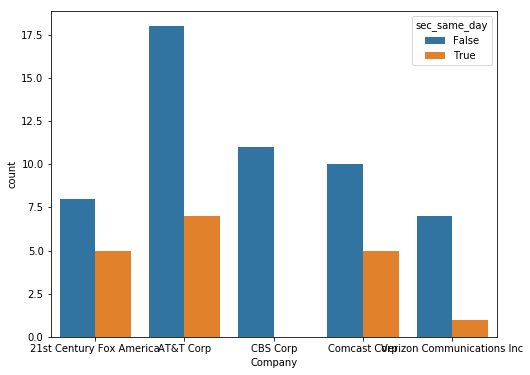

In [19]:
import seaborn as sns
# sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x='Company', data=df_moody, hue='sec_same_day')

fig.savefig('EDA_figs/fig_EDA_Moodys-OAS-stock_same_day_SEC-Moody.pdf')

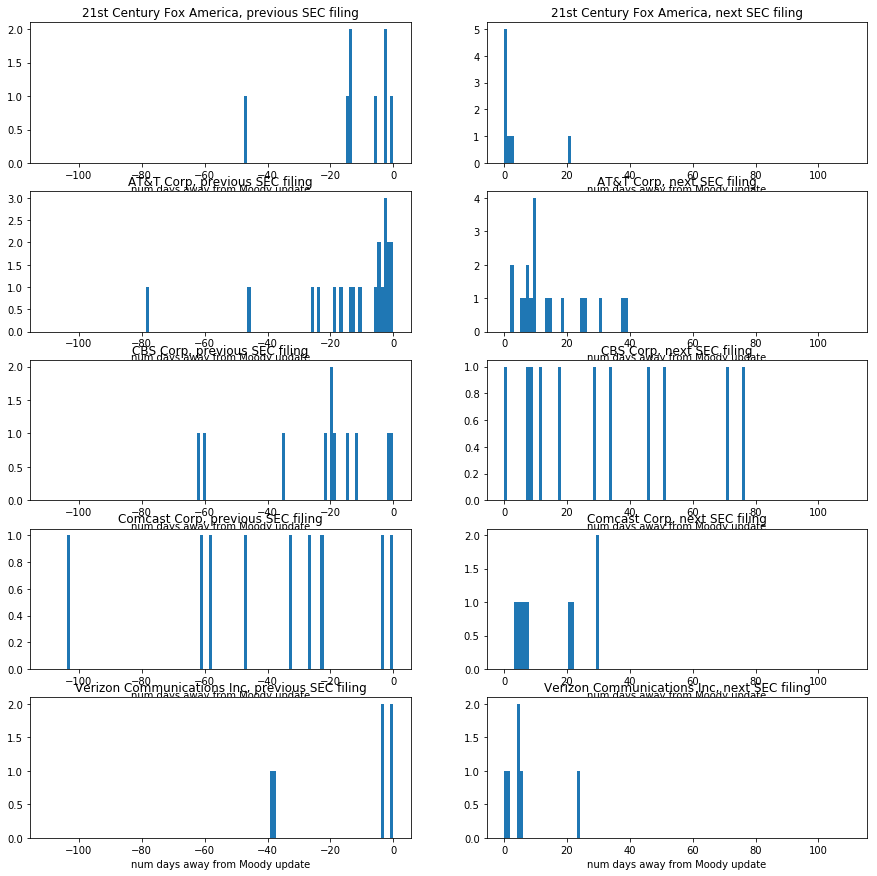

In [20]:
fig, axes = plt.subplots(5,2, figsize=(15,15))
axes = axes.ravel()

for i, comp in enumerate(df_moody.Company.unique()):
    ax = axes[2*i]
    
    df_temp = df_moody[df_moody.Company==comp]
    ax.hist(df_temp.sec_prev[~np.isnan(df_temp.sec_prev)], bins=np.linspace(-110,0,110))
#     ax.set_xlim([-100,0])
    ax.set_title(comp+', previous SEC filing')
    
    
    ax2 = axes[2*i+1]
    ax2.hist(df_temp.sec_next[~np.isnan(df_temp.sec_next)], bins=np.linspace(0,110,110))
#     ax2.set_xlim([0,100])
    ax2.set_title(comp+', next SEC filing')
    
#     if i==9:
    ax.set_xlabel('num days away from Moody update')
    ax2.set_xlabel('num days away from Moody update')
    
plt.show()

fig.savefig('EDA_figs/fig_EDA_Moodys-OAS-stock_previous&next_SEC.pdf')

In [21]:
df_moody.to_csv('my_moody.csv')

In [22]:
print(df_moody[df_moody.sec_next<=4].shape)
df_moody[df_moody.sec_next<=4]

(13, 10)


,index,Company,Moody's Rating,Watch,Type,Effective Date,num_rating,sec_same_day,sec_prev,sec_next
5,3,21st Century Fox America,Baa3,-,down,2005-01-25,4.0,False,-15.0,2.0
6,2,21st Century Fox America,Baa3,+,up,2005-09-22,4.0,False,-14.0,1.0
7,1,21st Century Fox America,Baa2,NaN,up,2005-11-21,5.0,True,-3.0,1.0
9,12,21st Century Fox America,Baa1,NaN,up,2008-06-11,6.0,True,-1.0,1.0
10,11,21st Century Fox America,Baa1,-,down,2016-12-12,6.0,False,-3.0,3.0
11,10,21st Century Fox America,Baa1,NaN,up,2016-12-15,6.0,True,-6.0,1.0
12,9,21st Century Fox America,Baa1,+,up,2017-12-14,6.0,True,-14.0,1.0
23,27,AT&T Corp,Baa2,-,down,2004-06-28,5.0,False,-11.0,3.0
26,24,AT&T Corp,Baa2,NaN,up,2005-11-18,5.0,False,-3.0,3.0
41,45,CBS Corp,Baa3,+,up,1999-09-07,4.0,False,-35.0,1.0


In [23]:
print(df_moody[df_moody.sec_next>=-4].shape)
df_moody[df_moody.sec_prev>=-4]

(71, 10)


,index,Company,Moody's Rating,Watch,Type,Effective Date,num_rating,sec_same_day,sec_prev,sec_next
7,1,21st Century Fox America,Baa2,NaN,up,2005-11-21,5.0,True,-3.0,1.0
9,12,21st Century Fox America,Baa1,NaN,up,2008-06-11,6.0,True,-1.0,1.0
10,11,21st Century Fox America,Baa1,-,down,2016-12-12,6.0,False,-3.0,3.0
20,30,AT&T Corp,A2,-,down,2000-11-15,8.0,False,-2.0,117.0
24,26,AT&T Corp,Ba1,NaN,down,2004-07-29,3.0,False,-1.0,7.0
26,24,AT&T Corp,Baa2,NaN,up,2005-11-18,5.0,False,-3.0,3.0
27,23,AT&T Corp,A2,NaN,up,2005-12-19,8.0,False,-3.0,38.0
29,21,AT&T Corp,A2,NaN,up,2006-07-27,8.0,False,-2.0,8.0
31,19,AT&T Corp,A2,NaN,up,2011-12-20,8.0,True,-1.0,9.0
33,17,AT&T Corp,A3,NaN,down,2013-01-29,7.0,False,-4.0,6.0


In [24]:
print(df_moody[df_moody.sec_same_day==True].shape)
df_moody[df_moody.sec_same_day==True]

(18, 10)


,index,Company,Moody's Rating,Watch,Type,Effective Date,num_rating,sec_same_day,sec_prev,sec_next
7,1,21st Century Fox America,Baa2,NaN,up,2005-11-21,5.0,True,-3.0,1.0
8,0,21st Century Fox America,Baa2,+,up,2008-04-16,5.0,True,-47.0,21.0
9,12,21st Century Fox America,Baa1,NaN,up,2008-06-11,6.0,True,-1.0,1.0
11,10,21st Century Fox America,Baa1,NaN,up,2016-12-15,6.0,True,-6.0,1.0
12,9,21st Century Fox America,Baa1,+,up,2017-12-14,6.0,True,-14.0,1.0
25,25,AT&T Corp,Ba1,+,up,2005-01-31,3.0,True,-5.0,25.0
28,22,AT&T Corp,A2,-,down,2006-03-06,8.0,True,-5.0,39.0
30,20,AT&T Corp,A2,-,down,2011-03-21,8.0,True,-14.0,10.0
31,19,AT&T Corp,A2,NaN,up,2011-12-20,8.0,True,-1.0,9.0
34,16,AT&T Corp,A3,-,down,2014-05-19,7.0,True,-17.0,15.0
